# K Nearest Neighbour classification and K means clustering

## 1. What is the difference between classification and clustering?

---



- Classification vs Clustering

- Used for supervised learning  vs unsupervised learning

- Class labels are available vs not available

- Training the model is there vs not there

- Complex vs simple

- Examples
Logistic regression, Support vector machines
vs
k-means clustering algorithm

## 2. Explain in brief the working of KNN

- K Nearest Neighbor (KNN) is easy to implement the algorithm

- It is used to identify K neartest neighbours from the given point in n-dimentional space

- Algorith use the euclidian distance from the given point to identify nearest neighbours

- It is Supervised Learning category

- Data scalling is required for accurate measurements

## 3. Explain in brief the working of K means

- The K-means clustering algorithm computes centroids and repeats until the optimal centroid is found

- We need to decide how many clusters there are

- The number of clusters found from data by the method is denoted by the letter ‘K’ in K-means.

- Data points are assigned to clusters in such a way that the sum of the squared distances between the data points and the centroid is as small as possible

- So entire algorith is to find centrroid - compute distance from centroid - assign each point in to new cluster - again complute the centroid.

## 4. What is the meaning of K in KNN and K means

KNN : K means the how many nearest point we wants to find

K-means : K means how mant cluesters are used to divide the data points in the groups

## 5. Explain any 5 distance metrics in short.


“euclidean” : EuclideanDistance : (sum((x1 - x2)^2))^ (1/2)
- Euclidean distance between two points in Euclidean space is the length of a line segment between the two points


“manhattan” :ManhattanDistance : sum(|x1 - x2|)
- Manhattan Distance is the sum of the lengths of the projections of the line segment between the points onto the coordinate axes. 


“chebyshev” :ChebyshevDistance :max(|x1 - x2|)
- Chebyshev distance is a distance metric which is the maximum absolute distance in one dimension of two N dimensional points.


“minkowski” : MinkowskiDistance : p, w : sum(w * |x2 - x2|^p)^(1/p)
- The Minkowski distance or Minkowski metric is a metric in a normed vector space which can be considered as a generalization of both the Euclidean distance and the Manhattan distance. 

“wminkowski” : WMinkowskiDistance : p, w : sum(|w * (x1 - x2)|^p)^(1/p)
- It is weighted Minkowski distance

“seuclidean” :SEuclideanDistance :V : sqrt(sum((x - y)^2 / V))
- It is standardized Euclidean distance

“mahalanobis” : MahalanobisDistance : V or VI : sqrt((x - y)' V^-1 (x - y))
- The Mahalanobis distance (MD) is the distance between two points in multivariate space. So it can be used where variables are dependent which is not possible in ED.

## 6. load and plot the dataset S1.txt file (comment how many natural classes you see)

There are 15 natural classes according to scatter plots

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
S1df=pd.read_csv('S1.txt',sep="   ",header=None,names=["X","Y",])
S1df.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,X,Y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [ ]:
S1df.describe()

,X,Y
count,5000.000000,5000.000000
mean,514937.556600,494709.292800
std,244465.901926,235840.852969
min,19835.000000,51121.000000
25%,320352.500000,320107.750000
50%,505338.500000,526259.500000
75%,786228.750000,713713.500000
max,961951.000000,970756.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


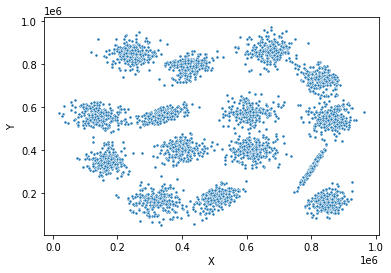

In [ ]:
sns.scatterplot(S1df['X'],S1df['Y'],marker='.')

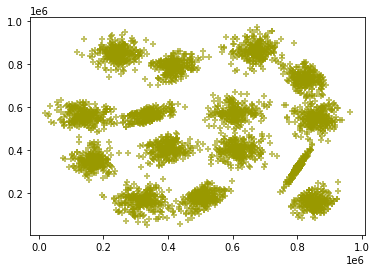

In [ ]:
plt.scatter(S1df['X'],S1df['Y'],marker='+',c='#999900',alpha=0.6,linewidth=2)

## 7. load the labels for the dataset and perform classification using KNN algorithm without using any library

In [ ]:
S1lab=pd.read_csv('S1-labels.pa',sep=' ',skiprows=5,header=None,names=['Class'])
S1lab

,Class
0,1
1,1
2,1
3,1
4,1
...,...
4995,15
4996,15
4997,15
4998,15


In [ ]:
Class_counts=S1lab.value_counts()
print(Class_counts)
Class_counts=len(Class_counts)
Class_counts

Class
12       350
13       350
14       350
15       350
11       346
10       345
9        340
7        334
8        333
6        329
5        321
4        320
2        317
3        315
1        300
dtype: int64


15

In [ ]:
def most_found(array):
    list_of_words = []
    for i in range(len(array)):
        if array[i] not in list_of_words:
            list_of_words.append(array[i])
            
    most_counted = ''
    n_of_most_counted = None
    
    for i in range(len(list_of_words)):
        counted = array.count(list_of_words[i])
        if n_of_most_counted == None:
            most_counted = list_of_words[i]
            n_of_most_counted = counted
        elif n_of_most_counted < counted:
            most_counted = list_of_words[i]
            n_of_most_counted = counted
        elif n_of_most_counted == counted:
            most_counted = None
            
    return most_counted

def find_neighbors(point, data, labels, k):
    # How many dimentions do the space have?
    n_of_dimensions = len(point)
    
    #find nearest neighbors
    neighbors = []
    neighbor_labels = []
    
    for i in range(0, k):
        # To find it in data later, I get its order
        nearest_neighbor_id = None
        smallest_distance = None
        
        for i in range(0, len(data)):
            eucledian_dist = 0
            for d in range(0, n_of_dimensions):
                dist = abs(point[d] - data[i][d])
                eucledian_dist += dist
                
            eucledian_dist = np.sqrt(eucledian_dist)
            
            if smallest_distance == None:
                smallest_distance = eucledian_dist
                nearest_neighbor_id = i
            elif smallest_distance > eucledian_dist:
                smallest_distance = eucledian_dist
                nearest_neighbor_id = i
                
        neighbors.append(data[nearest_neighbor_id])
        neighbor_labels.append(labels[nearest_neighbor_id])
        
        data.remove(data[nearest_neighbor_id])
        labels.remove(labels[nearest_neighbor_id])
    return neighbor_labels

def k_nearest_neighbor(point, data, labels, k):
    while True:
        neighbor_labels = find_neighbors(point, data, labels, k=k)
        label = most_found(neighbor_labels)
        if label != None:
            break
        k += 1
        if k >= len(data):
            break
            
    return label

point = [10500, 500000]
k_nearest_neighbor(point,S1df.values.tolist(),S1lab.values.tolist(), k=5)

[11]

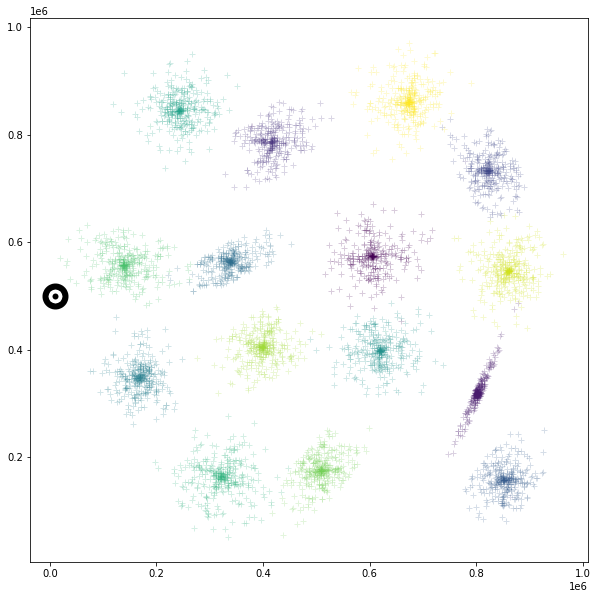

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(S1df['X'],S1df['Y'],c=S1lab.values.tolist(),marker='+',alpha=0.2,linewidth=1)
plt.scatter(point[0],point[1],c='#000000',marker='o',alpha=1,linewidth=20)

## 8. perform classification on the above dataset using KNN from sklearn (try different distance metrics and compare their results)

Different distance metrics like euclidean distance , manhattan distance and minkowski distance with p=3 were performed. All techniques perform differently which can be seed in confucion matrix. Though all techniques were giving around 99% accuracy on training data set.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
# Classification with euclidean distance 
classifier = KNeighborsClassifier(n_neighbors = 15,metric='euclidean')
classifier.fit(S1df,S1lab)
S1lab_pred = classifier.predict(S1df)
print(confusion_matrix(S1lab, S1lab_pred))
print(classification_report(S1lab, S1lab_pred))

[[297   0   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  0 314   1   0   0   0   0   0   0   0   0   0   0   2   0]
 [  0   0 313   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 314   4   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0 321   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 323   3   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   0 330   3   0   0   1   0   0   0   0]
 [  1   0   0   0   0   0   0 330   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   2 338   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3 339   0   3   0   0   0]
 [  0   0   0   0   0   4   0   0   0   0 342   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1 348   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0 349   0   0]
 [  0   0   0   3   0   0   0   0   0   0   0   0   0 347   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0   0 349]]
              precision    recall  f1-score   support


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


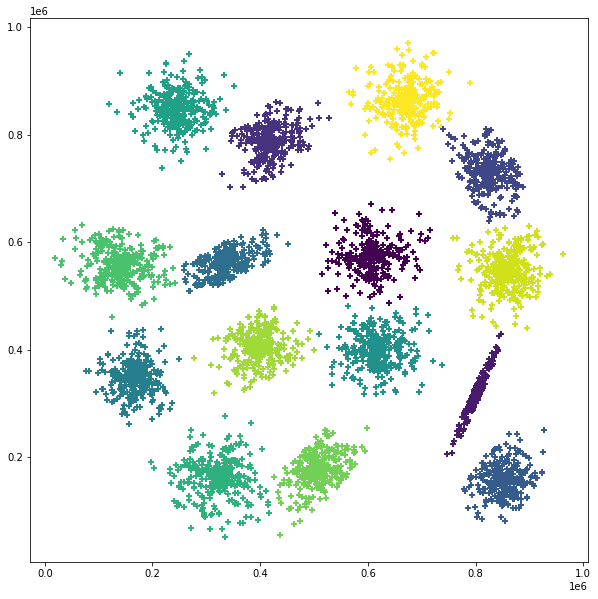

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data=S1df,x='X',y='Y',c=S1lab_pred,marker='+',alpha=2,linewidth=2)

In [ ]:
# Classification with manhattan distance 
classifier = KNeighborsClassifier(n_neighbors = 15,metric='manhattan')
classifier.fit(S1df,S1lab)
S1lab_pred = classifier.predict(S1df)
print(confusion_matrix(S1lab, S1lab_pred))
print(classification_report(S1lab, S1lab_pred))

[[297   0   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  0 314   1   0   0   0   0   0   0   0   0   0   0   2   0]
 [  0   0 313   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 314   4   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0 321   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 323   3   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   0 330   3   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0 331   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   2 338   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3 339   0   3   0   0   0]
 [  0   0   0   0   0   5   0   0   0   0 341   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1 348   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 350   0   0]
 [  0   0   0   3   0   0   0   0   0   0   0   0   0 347   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 350]]
              precision    recall  f1-score   support


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# Classification with minkowski distance 
classifier = KNeighborsClassifier(n_neighbors = 15,p=3,metric='minkowski')
classifier.fit(S1df,S1lab)
S1lab_pred = classifier.predict(S1df)
print(confusion_matrix(S1lab, S1lab_pred))
print(classification_report(S1lab, S1lab_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[297   0   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  0 314   1   0   0   0   0   0   0   0   0   0   0   2   0]
 [  0   0 313   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 314   4   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0 321   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 323   3   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   0 331   3   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0 330   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   2 338   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3 339   0   3   0   0   0]
 [  0   0   0   0   0   4   0   0   0   0 342   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1 348   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 350   0   0]
 [  0   0   0   3   0   0   0   0   0   0   0   0   0 347   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0   0 349]]
              precision    recall  f1-score   support


In [ ]:
# Train and Test split and comparation of model for classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(S1df,S1lab,test_size = 0.25)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[75  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0 81  1  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0 83  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 78  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 84  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 85  1  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0 76  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 80  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  2 82  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1 77  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 89  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1 72  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0 92  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0 86  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0 89]]
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        77
           2       1.00      0.98      0.99        83
           3       0.99      0.99      0.99        84
           4       0.95      0.99      0.97        79
        

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## 10. load and plot S2.txt

In [ ]:
S2df=pd.read_csv('S2.txt',sep='.   ',header=None,names=['X','Y'])
S2df

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,X,Y
0,62447,837604
1,67341,735362
2,64744,677000
3,53228,741384
4,64652,742844
...,...,...
4995,54011,671072
4996,50745,777031
4997,56926,738385
4998,44458,878830


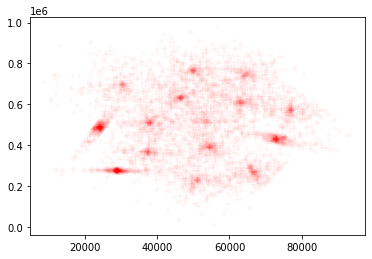

In [ ]:
plt.scatter(S2df['X'],S2df['Y'],marker='+',c='#ff0000',alpha=0.2,linewidth=0.2)

## 11. perform k means clustering on S2.txt without using any library and plot the results

8960 98229
[[62447, 837604, 0], [67341, 735362, 0], [64744, 677000, 0], [53228, 741384, 0], [64652, 742844, 0], [64753, 755101, 0], [64413, 777721, 0], [52136, 736923, 0], [68894, 798967, 0], [59266, 805244, 0], [64506, 716248, 0], [66674, 707391, 0], [66206, 644958, 0], [63062, 689662, 0], [62326, 774834, 0], [61789, 766560, 0], [56026, 629298, 0], [59572, 703618, 0], [59417, 665266, 0], [54486, 802997, 0], [51210, 686369, 0], [74224, 626859, 0], [70985, 684304, 0], [66285, 764737, 0], [61269, 778368, 0], [65601, 735274, 0], [64476, 750956, 0], [68885, 804551, 0], [71427, 804144, 0], [69547, 794296, 0], [74644, 829147, 0], [63297, 756806, 0], [67977, 842107, 0], [60976, 693428, 0], [66537, 784377, 0], [78366, 772895, 0], [65152, 719802, 0], [73015, 761390, 0], [70830, 692097, 0], [65720, 735978, 0], [65767, 809387, 0], [63697, 735247, 0], [64599, 751430, 0], [63425, 761114, 0], [63868, 658319, 0], [65140, 751827, 0], [74761, 624316, 3], [62383, 729538, 0], [66035, 757474, 0], [58871, 

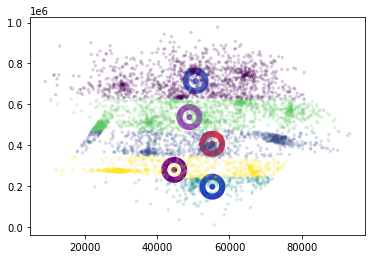

In [ ]:
import random

def train_k_means_clustering(data,k,epochs):
    dims = len(data[0])
    Min=min(min(data))
    Max=(max(max(data))-Min*40)
    print(Min,Max)
    centers = random_centers(dims,k,Min,Max)
    
    clustered_data = point_clustering(data, centers, dims, first_cluster=True)

    for i in range(epochs):
        centers = mean_center(clustered_data, centers, dims)
        clustered_data = point_clustering(data, centers, dims, first_cluster=False)
    
    return centers,clustered_data

def random_centers(dim,k,Min,Max):
    centers = []
    for i in range(k):
        center = []
        for d in range(dim):
            rand = random.randint(Min,Max)
            center.append(rand)
        centers.append(center)
    return centers

def mean_center(data, centers, dims):
    new_centers = []
    for i in range(len(centers)):
        new_center = []
        n_of_points = 0
        total_of_points = []
        for point in data:
            if point[-1] == i:
                n_of_points += 1
                for dim in range(0,dims):
                    if dim < len(total_of_points):
                        total_of_points[dim] += point[dim]
                    else:
                        total_of_points.append(point[dim])
        if len(total_of_points) != 0:
            for dim in range(0,dims):
                new_center.append(total_of_points[dim]/n_of_points)
            new_centers.append(new_center)
        else: 
            new_centers.append(centers[i])
    return new_centers


def point_clustering(data, centers, dims, first_cluster=False):
    for point in data:
        nearest_center = 0
        nearest_center_dist = None
        for i in range(0, len(centers)):
            euclidean_dist = 0
            for d in range(0, dims):
                dist = abs(point[d] - centers[i][d])
                euclidean_dist += dist
            euclidean_dist = np.sqrt(euclidean_dist)
            if nearest_center_dist == None:
                nearest_center_dist = euclidean_dist
                nearest_center = i
            elif nearest_center_dist > euclidean_dist:
                nearest_center_dist = euclidean_dist
                nearest_center = i
        if first_cluster:
            point.append(nearest_center)
        else:
            point[-1] = nearest_center
    #print(data)
    return data

def predict_k_means_clustering(point, centers):
    dims = len(point)
    center_dims = len(centers[0])
    
    if dims != center_dims:
        raise ValueError('Point given for prediction have', dims, 'dimensions but centers have', center_dims, 'dimensions')

    nearest_center = None
    nearest_dist = None
    
    for i in range(len(centers)):
        euclidean_dist = 0
        for dim in range(1, dims):
            dist = point[dim] - centers[i][dim]
            euclidean_dist += dist**2
        euclidean_dist = np.sqrt(euclidean_dist)
        if nearest_dist == None:
            nearest_dist = euclidean_dist
            nearest_center = i
        elif nearest_dist > euclidean_dist:
            nearest_dist = euclidean_dist
            nearest_center = i
        #print('center:',i, 'dist:',euclidean_dist)          
    return nearest_center

def plot_scat(centers,Marker,C,Alpha,Linewidth):
  Cx=[]
  Cy=[]
  for i in range(len(centers)):
    Cx.append(centers[i][0])
    Cy.append(centers[i][1])
  plt.scatter(Cx,Cy,marker=Marker,c=C,alpha=Alpha,linewidth=Linewidth)
  pass

centers,clustered_data = train_k_means_clustering(S2df.values.tolist(),k=5,epochs=7)
#print(centers)
print(clustered_data)

Colors=[]
for i in range(len(centers)):
  Colors.append("#%06x" % random.randint(0, 0xFFFFFF))
#print(Colors)

Clusters=[]
for i in range(len(clustered_data)):
  Clusters.append(clustered_data[i][2])
print(Clusters)


plt.figure()
plot_scat(centers,Marker='o',C=Colors,Alpha=1,Linewidth=20)
plot_scat(S2df.values.tolist(),Marker='.',C=Clusters,Alpha=0.2,Linewidth=0.2)

## 12. perform k means clustering on S2.txt using sklearn library and plot the results

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters =15,init='random',n_init=50,max_iter=50)
kmeans.fit(S2df)
y_kmeans = kmeans.predict(S2df)
plt.scatter(S2df['X'],S2df['Y'], c = y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black')

In [ ]:
from IPython.display import Javascript
display(Javascript("google.colab.output.resizeIframeToContent()"))